## Inicialización

In [57]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [58]:
# Carga los archivos de datos en diferentes DataFrames
mega_calls = pd.read_csv("/datasets/megaline_calls.csv")
mega_internet = pd.read_csv("/datasets/megaline_internet.csv")
mega_messages = pd.read_csv("/datasets/megaline_messages.csv")
mega_plans = pd.read_csv("/datasets/megaline_plans.csv")
mega_users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

## Tarifas

In [59]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
mega_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [60]:
print(mega_plans.head())
print()
print(mega_plans.isnull().sum())
print()
print(mega_plans.duplicated().sum())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

0


* Segun la informacion anterior no se logran observar valores nulos en ninguna columna de las presentes.
* Gracias a la consulta y verificacion del DataFrame no se lograron encontrar duplicados explicitos ni implicitos.
* En cuestion a los tipos de los datos no hay tipos de datos erroneos. 

## Usuarios/as

In [62]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [63]:
# Imprime una muestra de datos para usuarios
print(mega_users.sample(10))
print()
print(mega_users.isnull().sum())
print()
print(mega_users.duplicated().sum())

     user_id first_name last_name  age  \
26      1026     Meggan  Hamilton   49   
214     1214       Emil    Robles   34   
367     1367       Minh   Fischer   18   
227     1227     Vanesa    Willis   29   
338     1338     Janise    Bowman   21   
176     1176   Terrance   Shaffer   75   
421     1421       Zane     Hobbs   26   
84      1084      Wiley  Mckinney   21   
486     1486       Sang     Solis   29   
434     1434        Kai      Barr   18   

                                              city    reg_date      plan  \
26        Houston-The Woodlands-Sugar Land, TX MSA  2018-07-20  ultimate   
214         San Francisco-Oakland-Berkeley, CA MSA  2018-01-01  ultimate   
367              Baltimore-Columbia-Towson, MD MSA  2018-07-23      surf   
227            Dallas-Fort Worth-Arlington, TX MSA  2018-01-17      surf   
338    Minneapolis-St. Paul-Bloomington, MN-WI MSA  2018-08-09      surf   
176      New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-03      surf   
421  

### Corregir los datos

In [64]:
mega_users["reg_date"] = pd.to_datetime(mega_users["reg_date"])
mega_users["churn_date"].fillna("Plan Activo", inplace= True)

## Llamadas

In [65]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
mega_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [66]:
# Imprime una muestra de datos para las llamadas
print(mega_calls.sample(10))
print()
print(mega_calls.isnull().sum())
print()
print(mega_calls.duplicated().sum())

              id  user_id   call_date  duration
101089  1361_191     1361  2018-08-22      0.00
38106   1142_326     1142  2018-10-04      7.06
71565    1255_19     1255  2018-11-18      0.00
118198  1412_482     1412  2018-08-10      8.43
114971   1403_45     1403  2018-06-17      9.82
40012   1147_841     1147  2018-11-13     17.13
15155    1061_97     1061  2018-07-05      5.48
65690   1237_297     1237  2018-09-15      0.00
101249  1361_351     1361  2018-11-25     12.33
118810  1414_108     1414  2018-12-30      4.85

id           0
user_id      0
call_date    0
duration     0
dtype: int64

0


### Corregir los datos

In [67]:
mega_calls["call_date"] = pd.to_datetime(mega_calls["call_date"])

### Enriquecer los datos

In [68]:
mega_calls["month"] = mega_calls['call_date'].dt.month
mega_calls["month"] = mega_calls["month"].astype(int)
print(mega_calls)

              id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27      8.52     12
1       1000_145     1000 2018-12-27     13.66     12
2       1000_247     1000 2018-12-27     14.48     12
3       1000_309     1000 2018-12-28      5.76     12
4       1000_380     1000 2018-12-30      4.22     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21      8.72     11
137731  1499_200     1499 2018-10-20     10.89     10
137732  1499_201     1499 2018-09-21      8.12      9
137733  1499_202     1499 2018-10-10      0.37     10
137734  1499_203     1499 2018-12-29     13.86     12

[137735 rows x 5 columns]


## Mensajes

In [69]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [70]:
# Imprime una muestra de datos para los mensajes
print(mega_messages.sample(10))
print()
print(mega_messages.isnull().sum())
print()
print(mega_messages.duplicated().sum())
mega_messages.rename(columns= {"id":"message_id"}, inplace= True)

             id  user_id message_date
36017   1237_38     1237   2018-11-11
46311  1316_136     1316   2018-09-21
55491   1349_43     1349   2018-10-25
64537  1412_119     1412   2018-12-19
3279   1036_114     1036   2018-12-03
17329  1114_176     1114   2018-10-30
14847  1100_169     1100   2018-08-17
59269  1374_443     1374   2018-10-26
42282  1273_406     1273   2018-10-26
3843   1038_196     1038   2018-12-02

id              0
user_id         0
message_date    0
dtype: int64

0


### Corregir los datos

In [71]:
mega_messages["message_date"] = pd.to_datetime(mega_messages["message_date"])

### Enriquecer los datos

In [72]:
mega_messages["month"] = mega_messages['message_date'].dt.month 

## Internet

In [73]:
# Imprime la información general/resumida sobre el DataFrame de internet
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [74]:
# Imprime una muestra de datos para el tráfico de internet
print(mega_internet.sample(10))
print()
print(mega_internet.isnull().sum())
print()
print(mega_internet.duplicated().sum())
mega_internet.rename(columns= {"id":"internet_id"}, inplace= True)

             id  user_id session_date  mb_used
90771   1418_35     1418   2018-12-16   587.92
98547   1466_28     1466   2018-08-08   334.02
10701  1054_236     1054   2018-12-15   173.10
21690  1099_445     1099   2018-12-13   215.56
92517   1432_40     1432   2018-12-07   601.64
503    1004_104     1004   2018-10-24   857.60
73723  1346_305     1346   2018-11-10   338.48
30588  1140_131     1140   2018-11-04   587.82
10752  1054_287     1054   2018-05-20     0.00
31652  1144_388     1144   2018-05-17   189.59

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

0


### Corregir los datos

In [75]:
mega_internet["session_date"] = pd.to_datetime(mega_internet["session_date"])

### Enriquecer los datos

In [76]:
mega_internet["month"] = mega_internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [77]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(mega_plans.head())
mega_df = mega_users.merge(mega_calls, on= "user_id", how= "left")
mega_plans.rename(columns={"plan_name":"plan"}, inplace= True)
mega_df = mega_df.merge(mega_plans, on= "plan", how="left")
mega_df.rename(columns= {"usd_monthly_pay":"usd_monthly_fee",
                        "id":"calls_id"}, inplace= True)
print(mega_df.sample(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
        user_id first_name  last_name  age  \
47184      1171      Devin  Wilkinson   56   
56423      1202    Osvaldo      Mayer   36   
83764      1305      Gwenn      Gross   18   
126436     1449       Boyd     Kelley   39   
112755     1397     Willow     Steele   70   
120706     1421       Zane      Hobbs   26   
74825      1264     Jessie       Hill   69   
106250     1374      Ching      Watts   55   
6848       1031       Lane     Martin   52   
54158      1196       Noel     Dawson   46   

                                               city   reg_date      p

## Agregar datos por usuario


In [78]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
call_count = mega_df.groupby(by= ["user_id", "month"])["calls_id"].count()
print(call_count)

user_id  month
1000     12.0     16
1001     8.0      27
         9.0      49
         10.0     65
         11.0     64
                  ..
1498     12.0     39
1499     9.0      41
         10.0     53
         11.0     45
         12.0     65
Name: calls_id, Length: 2258, dtype: int64


In [79]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
mega_df["min_used"] = np.ceil(mega_df["duration"])
minutes = mega_df.groupby(by= ["user_id", "month"])["min_used"].sum()
print(minutes)

user_id  month
1000     12.0     124.0
1001     8.0      182.0
         9.0      315.0
         10.0     393.0
         11.0     426.0
                  ...  
1498     12.0     339.0
1499     9.0      346.0
         10.0     385.0
         11.0     308.0
         12.0     496.0
Name: min_used, Length: 2258, dtype: float64


In [80]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
sms_count = mega_messages.groupby(by= ["user_id", "month"])["message_id"].count()
print(sms_count)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: message_id, Length: 1806, dtype: int64


In [81]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_expense = mega_internet.groupby(by= ["user_id", "month"])["mb_used"].sum()
print(internet_expense)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


In [82]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merge_df = pd.merge(call_count, minutes, on= ['user_id', 'month'], how= 'outer')
merge_df2 = pd.merge(merge_df, sms_count, on= ["user_id", "month"], how= "outer")
full_df = pd.merge(merge_df2, internet_expense, on= ["user_id", "month"], how= "outer")
full_df.rename(columns= {
    "calls_id":"num_calls",
    "minutes_included":"min_used",
    "message_id":"msg_sent"
}, inplace= True)
full_df.reset_index(inplace= True)
print(full_df.sample(20))

      user_id  month  num_calls  min_used  msg_sent   mb_used
1671     1366    9.0       96.0     608.0      18.0  18379.32
191      1048    9.0       32.0     260.0       NaN   8806.79
1859     1405    9.0       24.0     166.0      61.0  17472.55
1497     1332   10.0       40.0     272.0       6.0  27824.60
1025     1220   12.0       88.0     558.0      31.0  18578.62
1337     1293   12.0       86.0     624.0      89.0  29088.98
1998     1437   12.0      109.0     744.0       NaN  19789.64
940      1201    8.0       81.0     627.0       6.0  35507.10
1620     1358   10.0       64.0     451.0       3.0  16913.21
1399     1312    6.0       57.0     377.0      33.0  17076.09
1153     1251    9.0       74.0     537.0      29.0  21295.69
1374     1304   12.0       65.0     533.0      59.0  23251.89
241      1056    8.0       48.0     350.0      37.0  21623.82
734      1157    8.0       60.0     389.0       NaN  15398.11
1836     1401   12.0       97.0     635.0      69.0   8407.64
1244    

In [83]:
# Añade la información de la tarifa
full_merged_df = pd.merge(full_df, mega_users, on= "user_id", how= "left")

In [84]:
# Elimino valores ausentes que encontre luego de la fusion de los DataFrames
full_merged_df["msg_sent"].fillna(0, inplace= True)
full_merged_df["num_calls"].fillna(0, inplace= True)
full_merged_df["mb_used"].fillna(0, inplace= True)
full_merged_df["min_used"].fillna(0, inplace= True)

merg_full_df = pd.merge(full_merged_df, mega_plans, on= "plan", how= "left")
merg_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   float64       
 2   num_calls              2293 non-null   float64       
 3   min_used               2293 non-null   float64       
 4   msg_sent               2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   object        
 13  mes

In [85]:
# Calcula el ingreso mensual para cada usuario
data_full = merg_full_df.copy()

data_full.rename(columns={
    "min_used": "minutes_used",
    "msg_sent": "sms_sent",
    "mb_used": "gb_used",
    "usd_per_minute": "usd_per_extra_minute",
    "usd_per_message": "usd_per_extra_message",
    "usd_per_gb": "usd_per_extra_gb"
}, inplace=True)

data_full["gb_included"] = data_full["mb_per_month_included"] / 1024

data_full["extra_minutes"] = (data_full["minutes_used"] - data_full["minutes_included"]).clip(lower=0)
data_full["extra_messages"] = (data_full["sms_sent"] - data_full["messages_included"]).clip(lower=0)
data_full["extra_gb"] = (data_full["gb_used"] / 1024 - data_full["gb_included"]).clip(lower=0).apply(np.ceil)

data_full["extra_charges_minutes"] = data_full["extra_minutes"] * data_full["usd_per_extra_minute"]
data_full["extra_charges_messages"] = data_full["extra_messages"] * data_full["usd_per_extra_message"]
data_full["extra_charges_gb"] = data_full["extra_gb"] * data_full["usd_per_extra_gb"]

data_full["monthly_revenue"] = (
    data_full["usd_monthly_pay"] +
    data_full["extra_charges_minutes"] +
    data_full["extra_charges_messages"] +
    data_full["extra_charges_gb"]
)

print(data_full[["user_id", "month", "plan", "monthly_revenue", "minutes_used", "sms_sent", "gb_used"]].sample(10))

      user_id  month      plan  monthly_revenue  minutes_used  sms_sent  \
588      1127    7.0      surf            90.00         241.0      10.0   
43       1010    9.0      surf            43.03         601.0       0.0   
2196     1488   10.0      surf           107.20         740.0       0.0   
596      1128    8.0  ultimate            70.00          56.0      54.0   
830      1178   10.0      surf            20.00         396.0      39.0   
1706     1374    7.0      surf           200.39         380.0      63.0   
777      1166   10.0      surf            70.00         179.0       0.0   
1618     1358    8.0      surf            50.84         528.0       4.0   
1039     1223   12.0      surf           121.38         546.0      31.0   
974      1210    7.0      surf            21.80         560.0       0.0   

       gb_used  
588   21608.77  
43    16813.73  
2196  22980.46  
596   15748.49  
830   12326.45  
1706  32782.54  
777   19805.95  
1618  17708.56  
1039  24924.04  
974 

## Estudia el comportamiento de usuario

### Llamadas

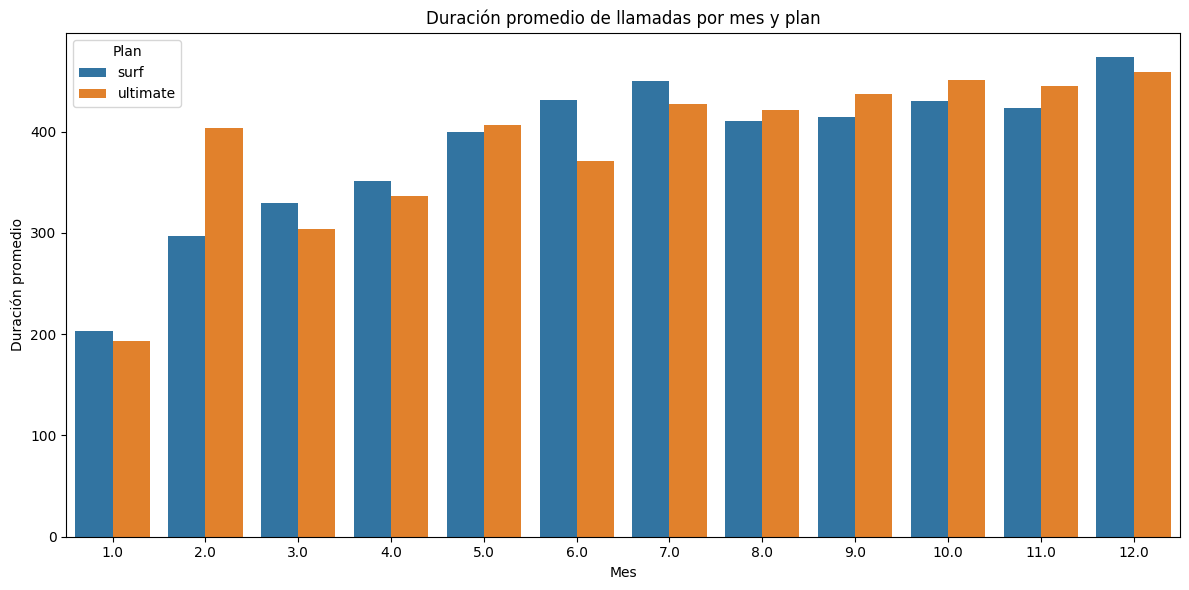

In [86]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_grp = data_full.groupby(by= ["month", "plan"])["minutes_used"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grp, x="month", y="minutes_used", hue="plan")

plt.title("Duración promedio de llamadas por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Duración promedio")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='minutes_used', ylabel='Count'>

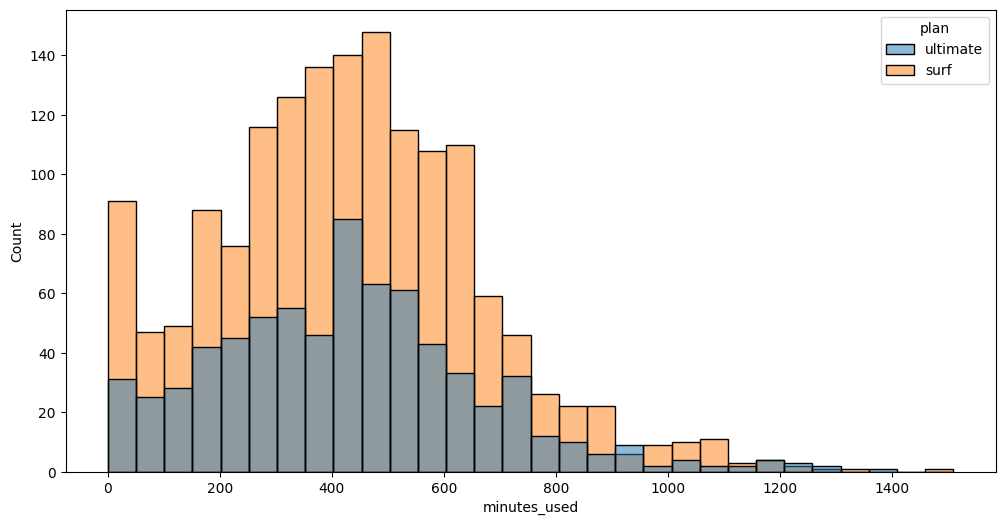

In [87]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
min_grp = data_full.groupby(by= ["user_id", "plan", "month"])["minutes_used"].sum().reset_index()
plt.figure(figsize=(12, 6))

sns.histplot(
    data= min_grp,
    x="minutes_used",
    hue="plan",             
    bins=30)

In [88]:
# Calcula la media y la varianza de la duración mensual de llamadas.
grp_mean = data_full.groupby(by= "plan")["minutes_used"].mean()
variance = np.var(data_full["minutes_used"])

print(variance)
print(grp_mean)

55822.82326365782
plan
surf        428.749523
ultimate    430.450000
Name: minutes_used, dtype: float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2293 non-null   int64         
 1   month                   2293 non-null   float64       
 2   num_calls               2293 non-null   float64       
 3   minutes_used            2293 non-null   float64       
 4   sms_sent                2293 non-null   float64       
 5   gb_used                 2293 non-null   float64       
 6   first_name              2293 non-null   object        
 7   last_name               2293 non-null   object        
 8   age                     2293 non-null   int64         
 9   city                    2293 non-null   object        
 10  reg_date                2293 non-null   datetime64[ns]
 11  plan                    2293 non-null   object        
 12  churn_date              2293 non-null   object  

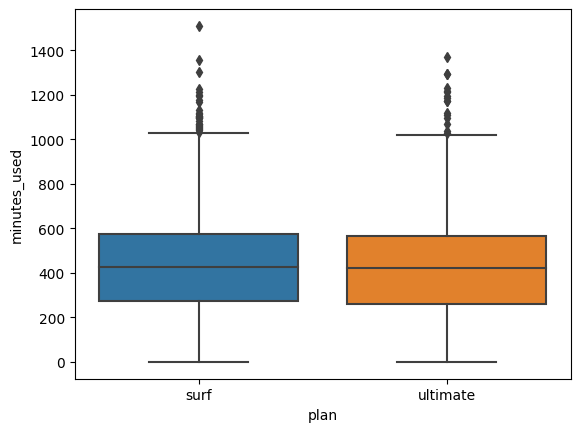

In [89]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_call_duration = data_full.groupby(["plan", 'user_id', 'month'])['minutes_used'].sum().reset_index()
sns.boxplot(x= "plan", y= "minutes_used", data= monthly_call_duration)
data_full.info()

### Mensajes

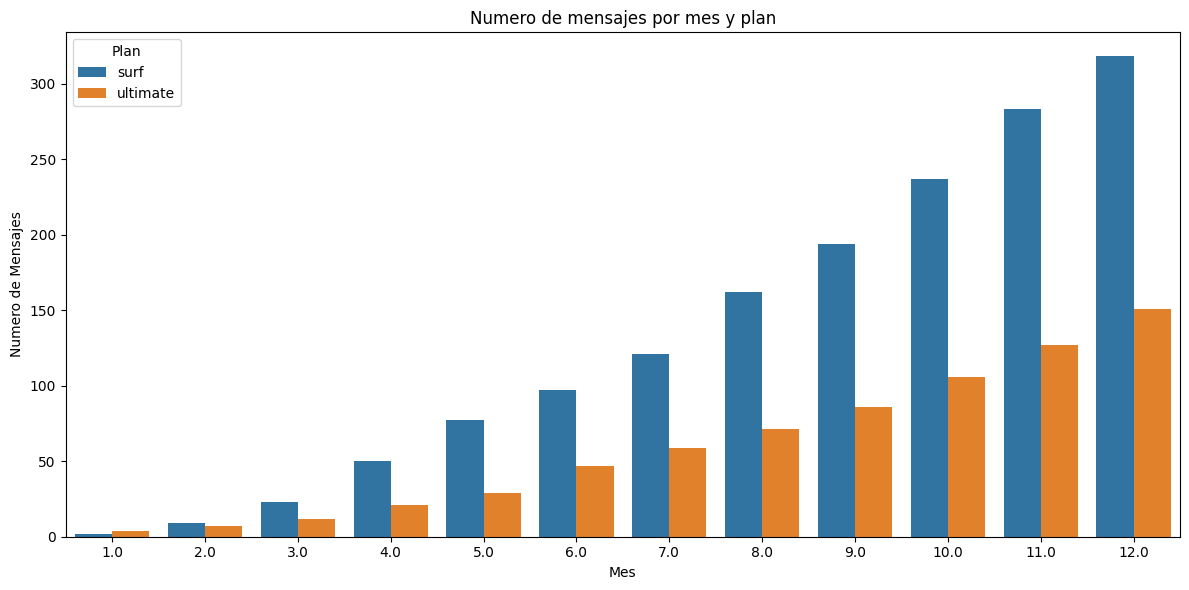

In [90]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msg_grp = data_full.groupby(by= ["month", "plan"])["sms_sent"].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data= msg_grp, x="month", y="sms_sent", hue="plan")

plt.title("Numero de mensajes por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Numero de Mensajes")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='plan'>

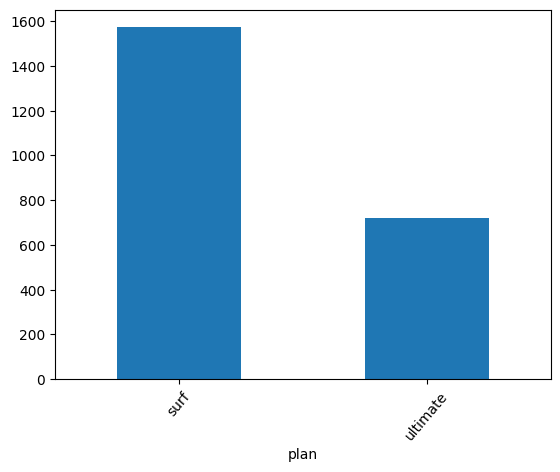

In [91]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mb_used_grp = data_full.groupby(by= "plan")["gb_used"].count()

mb_used_grp.plot(
    kind= "bar",
    x= "plan",
    y= "gb_used",
    rot= 50
)

<AxesSubplot:xlabel='sms_sent', ylabel='Count'>

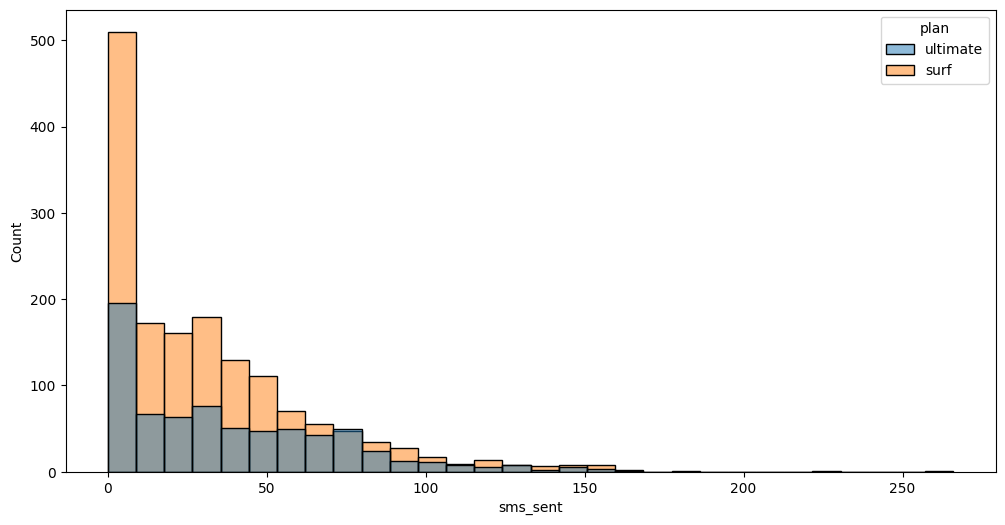

In [92]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
min_grp = data_full.groupby(by= ["user_id", "plan", "month"])["sms_sent"].sum().reset_index()
plt.figure(figsize=(12, 6))

sns.histplot(
    data= min_grp,
    x="sms_sent",
    hue="plan",             
    bins=30)

### Internet

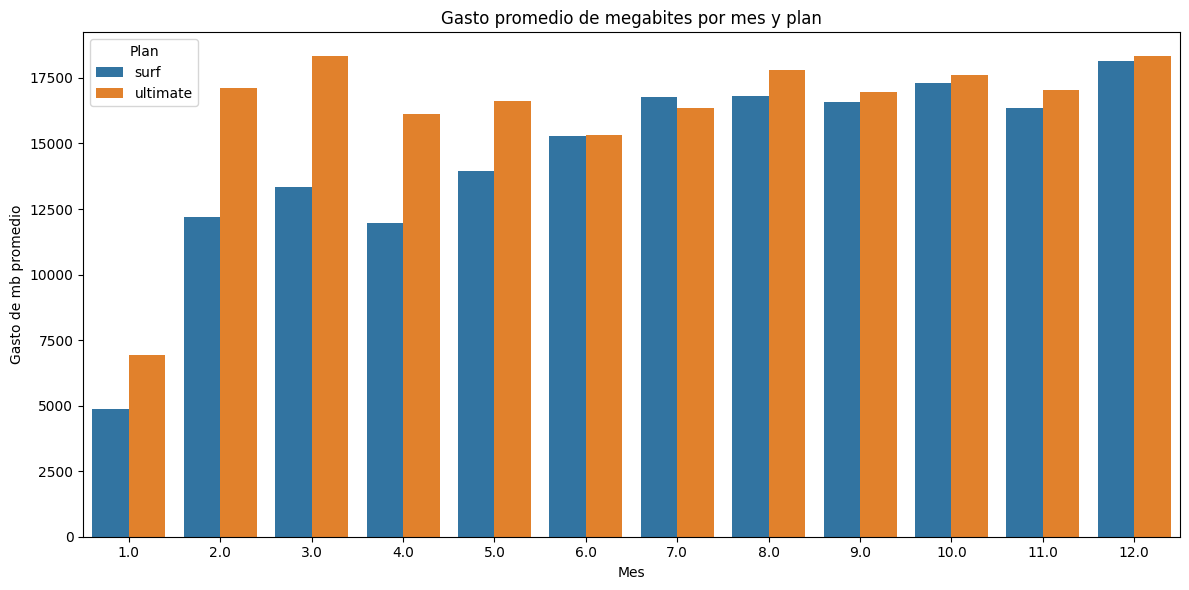

In [93]:
# Compara el gasto promedio de mb usados por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
internet_grp = data_full.groupby(by= ["month", "plan"])["gb_used"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data= internet_grp, x="month", y="gb_used", hue="plan")

plt.title("Gasto promedio de megabites por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Gasto de mb promedio")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='gb_used', ylabel='Count'>

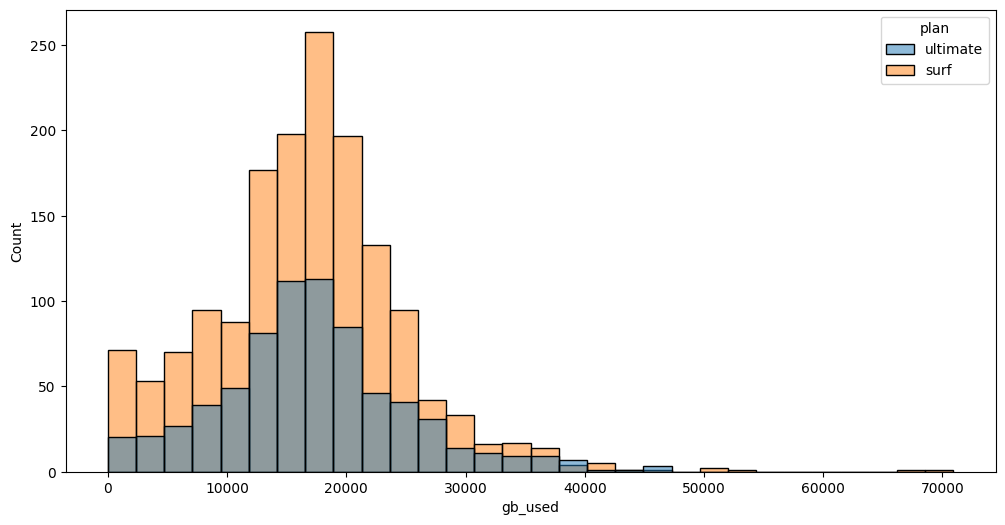

In [94]:
# Compara el número de megabites mensuales que necesitan los usuarios de cada plan. Traza un histograma.
mb_grp = data_full.groupby(by= ["user_id" ,"plan", "month"])["gb_used"].sum().reset_index()
plt.figure(figsize=(12, 6))

sns.histplot(
    data= mb_grp,
    x="gb_used",
    hue="plan",             
    bins=30)

<AxesSubplot:xlabel='plan', ylabel='gb_used'>

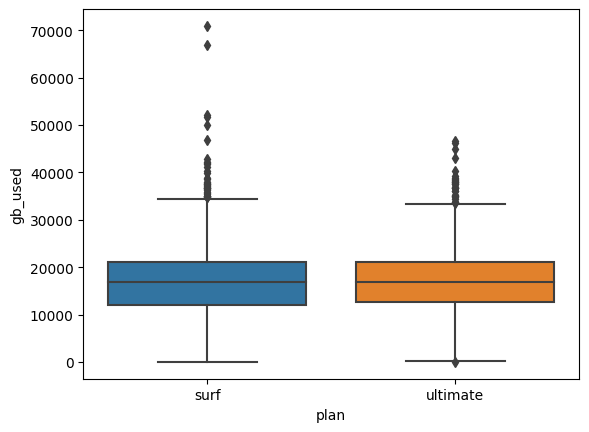

In [97]:
# Traza un diagrama de caja para visualizar la distribución del volumen mensual de datos gastados.
monthly_mb_usage = data_full.groupby(["plan", 'user_id', 'month'])['gb_used'].sum().reset_index()
sns.boxplot(x= "plan", y= "gb_used", data= monthly_mb_usage)

## Ingreso

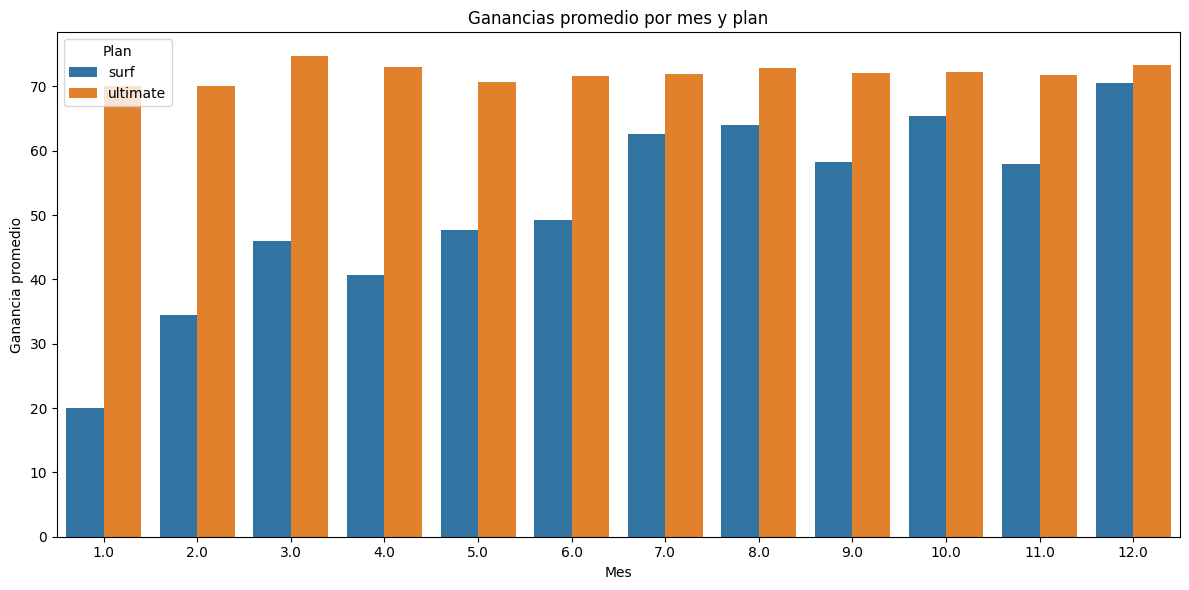

In [98]:
# Compara las ganancias mensuales por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
internet_grp = data_full.groupby(by= ["month", "plan"])["monthly_revenue"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data= internet_grp, x="month", y="monthly_revenue", hue="plan")

plt.title("Ganancias promedio por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Ganancia promedio")
plt.legend(title="Plan")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='monthly_revenue', ylabel='Count'>

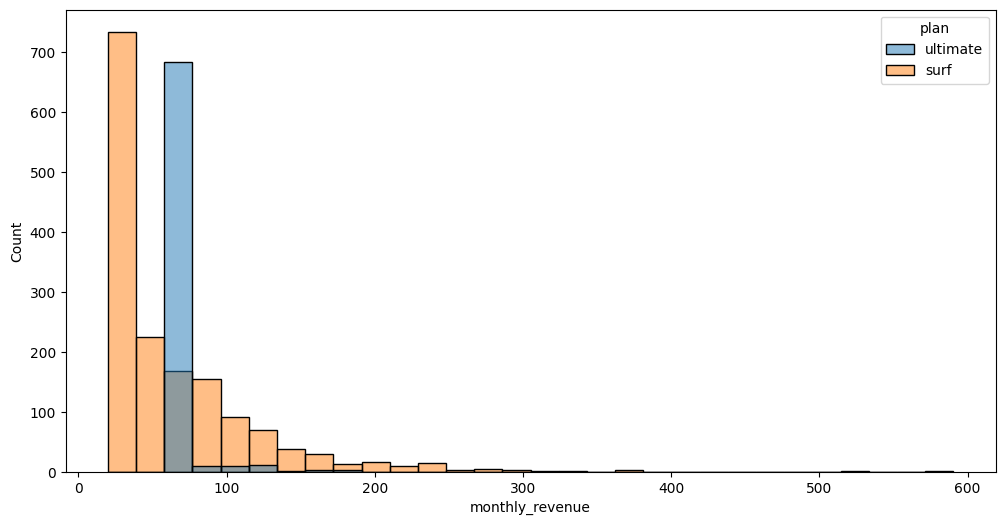

In [99]:
# Compara el número de gigabites extra usados los usuarios de cada plan. Traza un histograma.
gb_grp = data_full.groupby(by= ["user_id", "plan", "month"])["monthly_revenue"].sum().reset_index()
plt.figure(figsize=(12, 6))

sns.histplot(
    data= gb_grp,
    x="monthly_revenue",
    hue="plan",             
    bins=30)

<AxesSubplot:xlabel='plan', ylabel='monthly_revenue'>

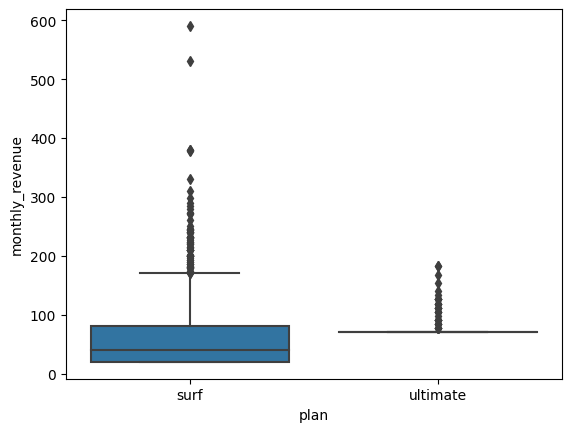

In [101]:
# Traza un diagrama de caja para visualizar la distribución de ingresos generados mensualmente.
monthly_mb_usage = data_full.groupby(["plan", 'user_id', 'month'])['monthly_revenue'].sum().reset_index()
sns.boxplot(x= "plan",y= "monthly_revenue", data= monthly_mb_usage)

## Prueba las hipótesis estadísticas

In [102]:
# Prueba las hipótesis
df_clean = data_full.dropna(subset=['plan', 'monthly_revenue'])
alpha = 0.05
us_surf = df_clean[df_clean["plan"] == "surf"].groupby(by= "user_id")["monthly_revenue"].mean()
us_ultimate = df_clean[df_clean["plan"] == "ultimate"].groupby(by= "user_id")["monthly_revenue"].mean()
results = st.ttest_ind(us_surf, us_ultimate, equal_var= False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 5.719435130362408e-08
Rechazamos la hipótesis nula


In [103]:
# Prueba las hipótesis
ny_nj = df_clean[df_clean["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"].groupby(by= "user_id")["monthly_revenue"].mean()
other_region = df_clean[df_clean["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"].groupby(by= "user_id")["monthly_revenue"].mean()
result = st.ttest_ind(ny_nj, other_region, equal_var= False)

print('valor-p:', result.pvalue)

if (result.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor-p: 0.44104821081481804
No podemos rechazar la hipótesis nula


## Conclusión general

El presente análisis se realizó con una muestra de 500 clientes de Megaline para comparar el comportamiento y los ingresos generados por los dos planes prepago disponibles: Surf y Ultimate.

**Comportamiento del usuario**

Se observó que la duración promedio de llamadas es mayor en el plan Surf, donde los usuarios tienden a consumir una mayor cantidad de minutos mensuales en comparación con los usuarios del plan Ultimate. En cuanto al número de mensajes enviados, los usuarios del plan Surf también presentan un volumen ligeramente superior. En relación con el uso de datos móviles, el tráfico de internet consumido es notablemente mayor en el plan Surf, superando considerablemente al uso observado en el plan Ultimate. Aunque el plan Ultimate presenta picos de desempeño en algunos meses, la tendencia general del comportamiento de uso favorece al plan Surf.

**Análisis de ingresos**

Respecto a los ingresos mensuales generados por usuario, el plan Ultimate supera de manera intermedia al plan Surf. Esto podría explicarse por una mayor adquisición de este plan por parte de los clientes, a pesar del menor consumo promedio de minutos, mensajes y datos.

**Pruebas estadísticas**

Diferencia en ingresos promedio entre planes Ultimate y Surf:
El valor-p obtenido fue 5.719435130362408e-08, lo que permite rechazar la hipótesis nula de igualdad. Esto indica que los ingresos promedio generados por los usuarios del plan Ultimate son estadísticamente diferentes (y mayores) que los del plan Surf.

Diferencia en ingresos promedio entre usuarios del área NY-NJ y otras regiones:
Con un valor-p de 0.44104821081481804, no se puede rechazar la hipótesis nula, lo que sugiere que no existen diferencias estadísticamente significativas entre los ingresos promedio generados por usuarios de NY-NJ y los de otras regiones.